In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm


yt = c + ϵt + θ1ϵt−1 + θ2ϵt−2 + ... + θqϵt−q,

In [2]:
def get_ma_model1(c, n, q, theta, burnin=100):
    """
    Generate a moving average (MA) model for a given time series data.

    Parameters:
    - c: Constant term.
    - n: Number of time steps.
    - q: The order of the moving average model.
    - theta: Numpy array representing the random noise.
    - burnin: Number of initial values to discard.

    Returns:
    - ma_model: A numpy array representing the moving average model.
    """
    
    eps = np.random.normal(size=n + burnin)
    ma_model = np.zeros(n + burnin)

    for t in range(q, n + burnin):
        ma_model[t] = c + eps[t] + np.dot(theta, eps[t - q:t][::-1])

    return ma_model[burnin:]




In [3]:
def get_ma_model2(n, q, theta, burnin=0):
    """
    Generate a moving average (MA) model for a given time series data.

    Parameters:
    - c: Constant term.
    - n: Number of time steps.
    - q: The order of the moving average model.
    - theta: Numpy array representing the random noise.
    - burnin: Number of initial values to discard.

    Returns:
    - ma_model: A numpy array representing the moving average model.
    """
    np.random.seed(0)
    eps = np.random.normal(size=n + burnin)
    ma_model = np.zeros(n + burnin)

    for t in range(q, n + burnin):
        ma_model[t] =eps[t]-eps[t - q] + np.dot(theta, eps[t - q:t][::-1])

    return ma_model[burnin:]

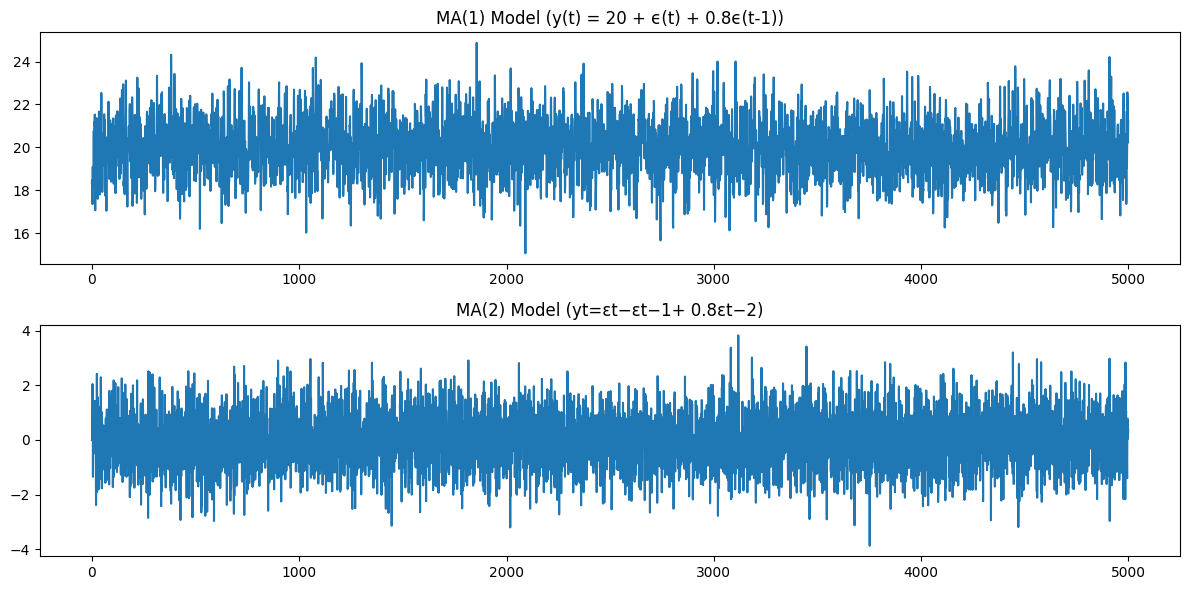

In [4]:
# Generate MA(1) model
ma1_data = get_ma_model1(20, 5000, 1, [0.8])

# Generate MA(2) model
ma2_data2 = get_ma_model2(5000, 1, [0.8])
# Plot MA(1) and MA(2) time series
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(ma1_data)
ax[0].set_title('MA(1) Model (y(t) = 20 + ϵ(t) + 0.8ϵ(t-1))')
ax[1].plot(ma2_data2)
ax[1].set_title('MA(2) Model (yt=εt−εt−1+ 0.8εt−2)')
plt.tight_layout()
plt.show()

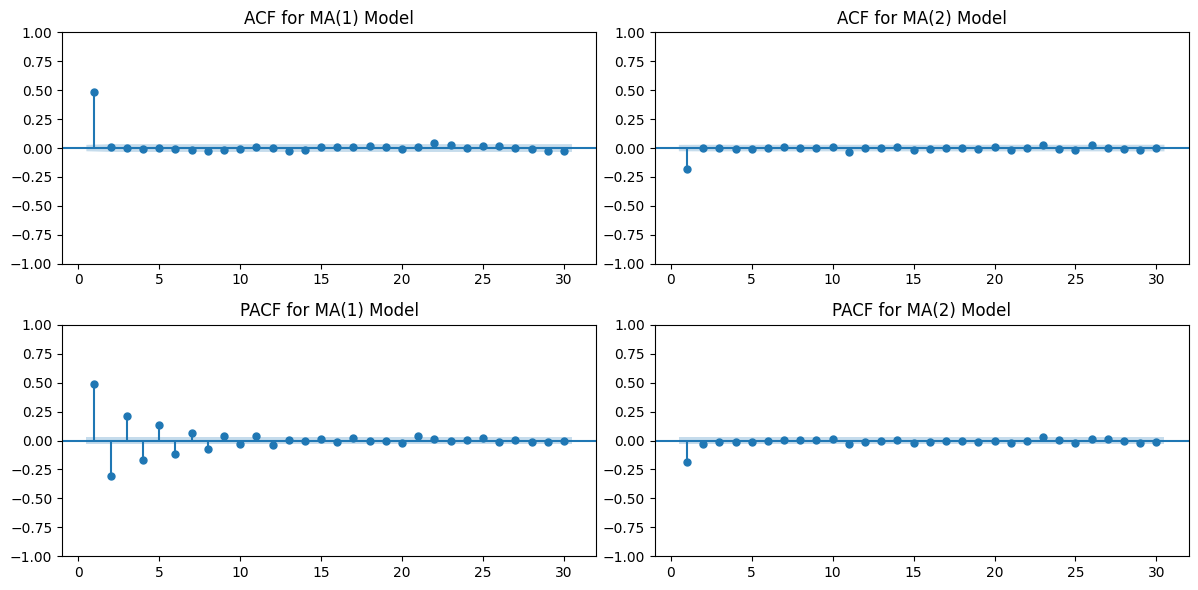

In [5]:
# Calculate ACF and PACF for MA(1) model
fig, ax = plt.subplots(2,2, figsize=(12, 6))
plot_acf(ma1_data, lags=30, title='ACF for MA(1) Model', ax=ax[0,0], zero=False)
plot_pacf(ma1_data, lags=30, title='PACF for MA(1) Model', ax=ax[1,0], zero=False)
plot_acf(ma2_data2, lags=30, title='ACF for MA(2) Model',ax=ax[0,1], zero=False)
plot_pacf(ma2_data2, lags=30, title='PACF for MA(2) Model',ax=ax[1,1], zero=False)
plt.tight_layout()
plt.show()
